# Exploring Dandiset 000563: Allen Institute Openscope - Temporal Barcoding

> **Disclaimer:** This notebook was generated by an AI assistant (Minicline) and provides examples for accessing and visualizing data from Dandiset 000563. The code and interpretations have not been fully verified by human experts. Please use caution when interpreting the results and verify any findings independently.

## Overview of the Dandiset

This Dandiset, titled "**Allen Institute Openscope - Barcoding**", contains data related to visual neuroscience experiments in mice. Specifically, it investigates neural responses to white noise flicker visual stimuli using Neuropixels probes for extracellular electrophysiology recordings.

**Dandiset Details:**
* **Identifier:** DANDI:000563
* **Version:** 0.250311.2145
* **URL:** https://dandiarchive.org/dandiset/000563/0.250311.2145
* **Description:** The experiment aims to understand how neurons in various mouse brain areas, including visual cortex and subcortical regions, respond to temporally precise white noise stimuli (Full Field Flicker and Static Gratings). The "bar-code-like" spike patterns observed in response to repeated stimuli are investigated as potential identifiers for discrete cell types.
* **Data Types:** Extracellular electrophysiology (Neuropixels), LFP, optogenetic tagging data, behavioral data (running speed, eye tracking).
* **License:** CC-BY-4.0

## Notebook Scope

This notebook demonstrates how to:
1. Connect to the DANDI archive and access metadata for Dandiset 000563.
2. List assets (files) within the Dandiset.
3. Load a specific NWB (Neurodata Without Borders) file from the Dandiset remotely using `pynwb` and `remfile`.
4. Explore the structure and basic metadata of the loaded NWB file.
5. Load and visualize subsets of data contained within the NWB file, including:
    * Pupil area from eye tracking.
    * Running speed.
6. Note that spike data (units) are typically found in `_ecephys.nwb` files, not the `_ogen.nwb` file explored here. Visualizing spike rasters would require loading one of those files.

The goal is to provide a starting point for researchers interested in working with this dataset.

## Required Packages

This notebook requires the following Python packages. We assume they are already installed in your environment.

* `dandi` (for interacting with the DANDI archive)
* `pynwb` (for reading NWB files)
* `h5py` (dependency for pynwb, used for HDF5 format)
* `remfile` (for streaming remote HDF5 files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced plot styling)
* `pandas` (for handling tabular data like the `units` table)

## Connecting to DANDI and Listing Assets

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plots
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description available.')[:200]}...") # Show first 200 chars

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size / (1024**3):.2f} GB)")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
Dandiset description: Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise sti...

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d, Size: 1.94 GB)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1, Size: 1.92 GB)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646, Size: 1.79 GB)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5, Size: 1.95 GB)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f, Size: 2.63 GB)


## Loading a Specific NWB File

We will now load one specific NWB file from the Dandiset to explore its contents. We'll use the file `sub-681446/sub-681446_ses-1290510496_ogen.nwb`. This `_ogen.nwb` file type typically contains behavioral data (like eye tracking, running), stimulus information, and optogenetic stimulation details, but usually *not* the primary spike-sorted electrophysiology results (which are often in corresponding `_ecephys.nwb` files). We chose this file type to demonstrate accessing these specific kinds of data structures.

We use `remfile` to stream the file contents directly from the DANDI archive URL without downloading the entire file. Accessing large files remotely like this is convenient but can sometimes be slow depending on network conditions and the amount of data requested. `remfile` helps by enabling partial reads of the file.

In [2]:
# Define the URL for the specific NWB file asset
# Asset ID: 2f2ac304-83a3-4352-8612-5f34b68062a0
# Path: sub-681446/sub-681446_ses-1290510496_ogen.nwb
nwb_url = "https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/"

print(f"Loading NWB file from: {nwb_url}")

# Use remfile to open the remote HDF5 file stream
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)

# Use pynwb to read the NWB file structure
# Ensure to open in read mode ('r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: 1290510496
Session Description: Data and metadata for an Ecephys session
Session Start Time: 2023-08-16 00:00:00-07:00


## Exploring the NWB File Structure

The loaded `nwbfile` object holds the data organized according to the NWB standard. Key information is typically found in the following attributes:

*   **`session_description`**: A brief description of the recording session.
*   **`identifier`**: A unique identifier for the session or file.
*   **`session_start_time`**: The date and time when the session began.
*   **`acquisition`**: Raw acquired data, often continuous signals like eye tracking or running wheel rotation. Contains `TimeSeries` or similar objects.
*   **`processing`**: Processed data derived from acquisition or other sources. This often includes modules for specific data types like 'running' (running speed) or 'optotagging'.
*   **`intervals`**: Time intervals corresponding to experimental epochs, stimuli, or other events. Often stored as `TimeIntervals` tables (e.g., stimulus presentations).
*   **`units`**: Information about sorted spike units, typically stored in a `Units` table containing spike times, waveforms, quality metrics, etc.
*   **`electrodes`**: Information about the recording electrodes, such as location and grouping.
*   **`stimulus`**: Information about stimuli presented during the experiment.
*   **`subject`**: Metadata about the experimental subject (species, age, genotype, etc.).

Let's look at some of the top-level components in our loaded file:

In [3]:
print("Available components in the NWB file:")
print(f"- Acquisition: {list(nwbfile.acquisition.keys())}")
print(f"- Processing Modules: {list(nwbfile.processing.keys())}")
print(f"- Intervals: {list(nwbfile.intervals.keys())}")
print(f"- Units available: {'units' in nwbfile.children}")
print(f"- Electrodes table available: {'electrodes' in nwbfile.children}")
print(f"- Subject Info: {nwbfile.subject}")

Available components in the NWB file:
- Acquisition: ['EyeTracking', 'raw_running_wheel_rotation', 'running_wheel_signal_voltage', 'running_wheel_supply_voltage']
- Processing Modules: ['optotagging', 'running', 'stimulus']
- Intervals: ['RepeatFFF_presentations', 'UniqueFFF_presentations', 'invalid_times', 'receptive_field_block_presentations', 'static_block_presentations']
- Units available: False
- Electrodes table available: False
- Subject Info: subject abc.EcephysSpecimen at 0x139355847968720
Fields:
  age: P112D
  age__reference: birth
  age_in_days: 112.0
  genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
  sex: M
  species: Mus musculus
  specimen_name: 681446
  strain: Transgenic
  subject_id: 681446



## Neurosift Link

You can explore this specific NWB file interactively using Neurosift:

[View sub-681446_ses-1290510496_ogen.nwb on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=draft)

## Visualizing Eye Tracking Data (Pupil Area)

The NWB file contains eye tracking data under `nwbfile.acquisition['EyeTracking']`. Let's plot a small segment of the pupil area to see how it changes over time. We will plot the first 1000 data points.

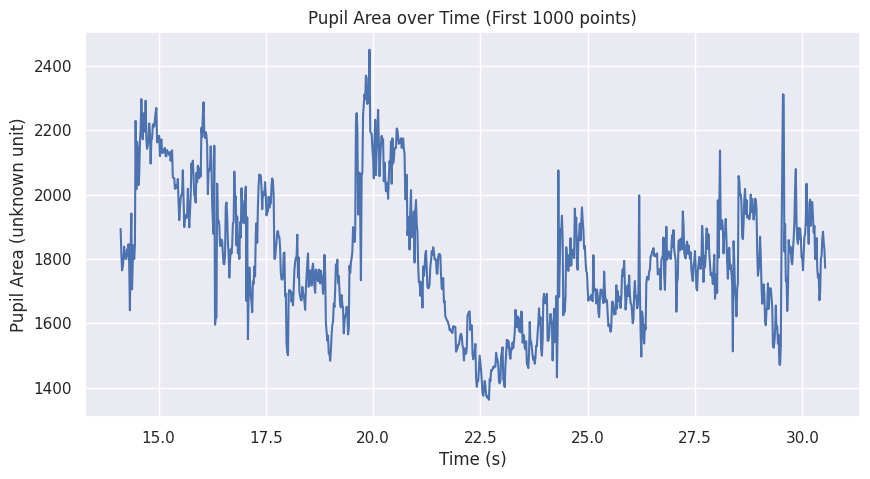

In [4]:
try:
    # Access pupil tracking data
    eye_tracking_module = nwbfile.acquisition.get('EyeTracking')
    if eye_tracking_module:
        pupil_tracking = eye_tracking_module.spatial_series.get('pupil_tracking')
        if pupil_tracking:
            pupil_area_data = pupil_tracking.area
            pupil_timestamps = pupil_tracking.timestamps

            # Select a subset of data to plot (e.g., first 1000 points)
            num_points_to_plot = 1000
            if len(pupil_area_data) >= num_points_to_plot:
                subset_pupil_area = pupil_area_data[:num_points_to_plot]
                subset_timestamps = pupil_timestamps[:num_points_to_plot]

                # Create the plot
                plt.figure(figsize=(10, 5))
                plt.plot(subset_timestamps, subset_pupil_area)
                plt.xlabel("Time (s)")
                # Attempt to get unit, default to 'unknown unit'
                unit = pupil_tracking.area.attrs.get('unit', 'unknown unit')
                plt.ylabel(f"Pupil Area ({unit})")
                plt.title(f"Pupil Area over Time (First {num_points_to_plot} points)")
                plt.grid(True)
                plt.show()
            else:
                print(f"Not enough data points for pupil area (found {len(pupil_area_data)}), skipping plot.")
        else:
            print("Could not find 'pupil_tracking' in EyeTracking spatial series.")
    else:
        print("Could not find 'EyeTracking' in acquisition.")
except Exception as e:
    print(f"An error occurred while plotting pupil data: {e}")

## Visualizing Running Speed

Running speed data is often found in the `processing` module. In this file, it's located under `nwbfile.processing['running']['running_speed']`. Let's plot a segment of this data (first 2000 points). This data represents the rotation of the running wheel; positive values might indicate one direction of rotation and negative values the other. Note that raw running speed data can sometimes appear noisy, as seen below; smoothing or downsampling might be applied for clearer analysis in further research.

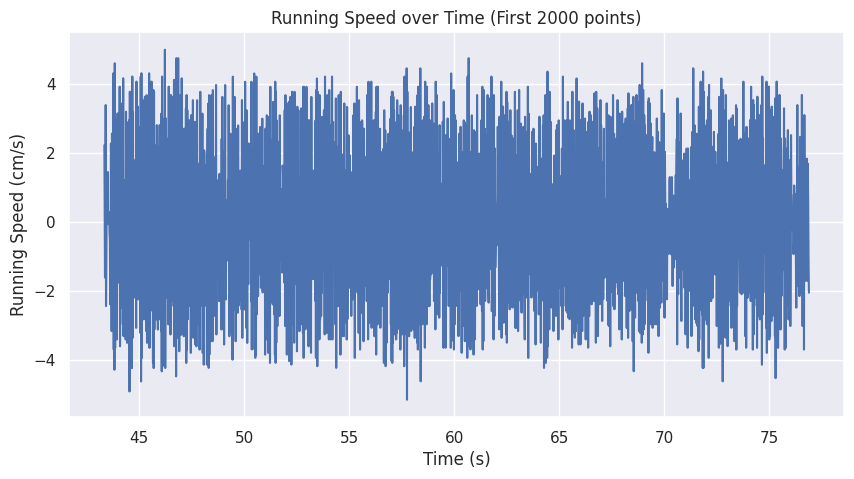

In [5]:
try:
    # Access running speed data
    running_module = nwbfile.processing.get('running')
    if running_module:
        running_speed_ts = running_module.data_interfaces.get('running_speed')
        if running_speed_ts:
            running_speed_data = running_speed_ts.data
            running_speed_timestamps = running_speed_ts.timestamps

            # Select a subset of data to plot (e.g., first 2000 points)
            num_points_to_plot = 2000
            if len(running_speed_data) >= num_points_to_plot:
                subset_running_speed = running_speed_data[:num_points_to_plot]
                subset_timestamps = running_speed_timestamps[:num_points_to_plot]

                # Create the plot
                plt.figure(figsize=(10, 5))
                plt.plot(subset_timestamps, subset_running_speed)
                plt.xlabel("Time (s)")
                plt.ylabel(f"Running Speed ({running_speed_ts.unit})")
                plt.title(f"Running Speed over Time (First {num_points_to_plot} points)")
                plt.grid(True)
                plt.show()
            else:
                print(f"Not enough data points for running speed (found {len(running_speed_data)}), skipping plot.")
        else:
            print("Could not find 'running_speed' in running processing module.")
    else:
        print("Could not find 'running' processing module.")
except Exception as e:
    print(f"An error occurred while plotting running speed: {e}")

## Summary and Future Directions

This notebook demonstrated how to access Dandiset 000563, load a specific NWB file primarily containing optogenetic, behavioral, and stimulus data (`sub-681446/sub-681446_ses-1290510496_ogen.nwb`), and visualize basic data types including pupil area and running speed.

**Key takeaways:**
* The DANDI API allows programmatic access to Dandisets and their assets.
* `pynwb` and `remfile` enable loading and exploration of remote NWB files without full downloads.
* NWB files organize diverse data types (behavior, stimulus, ephys) in a standardized structure. The `_ogen.nwb` file explored here is rich in behavioral and optogenetic metadata but does not contain spike-sorted unit data.
* Basic visualization of time series data (pupil area, running speed) is demonstrated. For spike data analysis, one would typically load an `_ecephys.nwb` file from this Dandiset.

**Possible future analyses:**
* Analyze data from `_ecephys.nwb` files to:
    * Correlate neural activity (spike rates) with behavioral variables like running speed or pupil dilation from the `_ogen.nwb` file (requiring data from the same session).
    * Analyze neural responses aligned to specific stimulus events.
    * Compare "bar-code" firing patterns across different units or stimulus conditions.
    * Perform more advanced analyses on spike trains (e.g., calculating PSTHs, cross-correlations).
* Investigate the effect of optogenetic stimulation (from `nwbfile.processing['optotagging']` in this `_ogen.nwb` file) on neural firing by correlating it with spike data from a corresponding `_ecephys.nwb` file.
* Explore data from other NWB files within the Dandiset, such as those containing raw Ecephys data from individual probes or LFP data.
* Apply smoothing or other preprocessing techniques to noisy signals like running speed for clearer interpretation.

In [6]:
# Close the HDF5 file and release resources
# It's good practice, though maybe not strictly necessary at the end of a notebook
try:
    io.close()
    print("\nNWB file closed.")
except Exception as e:
    print(f"Error closing NWB file: {e}")


NWB file closed.
